# Estimating Aqueous Solubility from Molecular structure

In [104]:
#https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
import pandas as pd
df=pd.read_csv('delaney-processed.csv',) #encoding='latin1')
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [20]:
df.smiles


0       OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1                                  Cc1occc1C(=O)Nc2ccccc2
2                                    CC(C)=CCCC(C)=CC(=O)
3                      c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4                                                 c1ccsc1
                              ...                        
1123                                     FC(F)(F)C(Cl)Br 
1124                            CNC(=O)ON=C(SC)C(=O)N(C)C
1125                                    CCSCCSP(=S)(OC)OC
1126                                              CCC(C)C
1127                COP(=O)(OC)OC(=CCl)c1cc(Cl)c(Cl)cc1Cl
Name: smiles, Length: 1128, dtype: object

In [21]:
!pip install rdkit-pypi

In [22]:
from rdkit import Chem

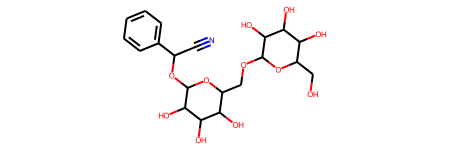

In [23]:
Chem.MolFromSmiles(df.smiles[0])

## Molecular Descriptors
###### cLogP- Octanol-water partition coefficient
###### MW- Molecular weight
###### RB- Number of rotatable bonds
###### AP- Aromatic proportion = number of aromatic atoms / number of heavy atoms
## ---------------------------------------------------------------------------


#### Getting LogP, MW and RB

#### Getting AP (number of aromatic atoms / number of heavy atoms)

## Making Dataset

#### Combine all computed descriptors from 2 dataframes(df2 and df_desc_AromaticProportion) into 1 dataframe.

In [24]:
#X matrix
X_list = [df["Molecular Weight"], df["Minimum Degree"], df["Number of H-Bond Donors"], df["Number of Rings"], df["Number of Rotatable Bonds"], df["Polar Surface Area"]]
X = pd.concat(X_list, axis=1)
X
df.describe()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


<AxesSubplot:>

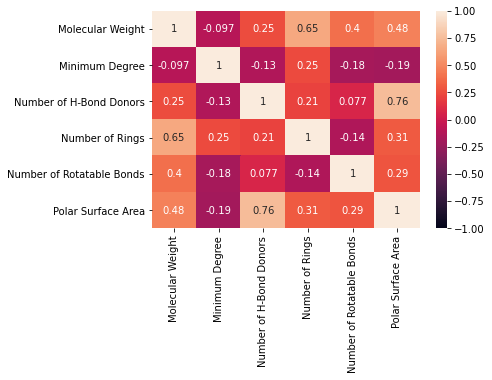

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

Var_Corr = X.corr()
# plot correlation heatmap
sns.heatmap(Var_Corr, vmin=-1, vmax=1, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [26]:
#Y matrix- the value we predict, logS
Y = df.iloc[:,-2]
Y

0      -0.770
1      -3.300
2      -2.060
3      -7.870
4      -1.330
        ...  
1123   -1.710
1124    0.106
1125   -3.091
1126   -3.180
1127   -4.522
Name: measured log solubility in mols per litre, Length: 1128, dtype: float64

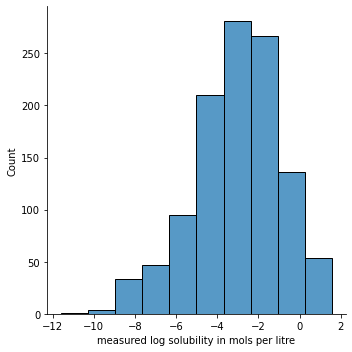

In [27]:
# Y_distribution = sns.load_dataset('delaney-processed.csv')
sns.displot(df["measured log solubility in mols per litre"], bins=10, )

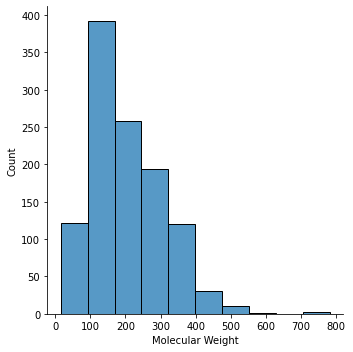

In [28]:
# Y_distribution = sns.load_dataset('delaney-processed.csv')
sns.displot(df["Molecular Weight"], bins=10, )

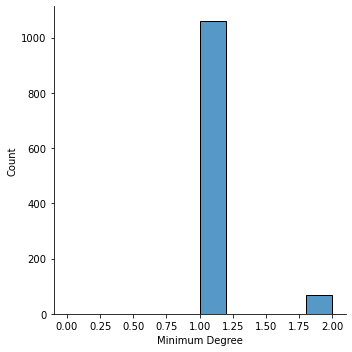

In [29]:
# Y_distribution = sns.load_dataset('delaney-processed.csv')
sns.displot(df["Minimum Degree"], bins=10, )

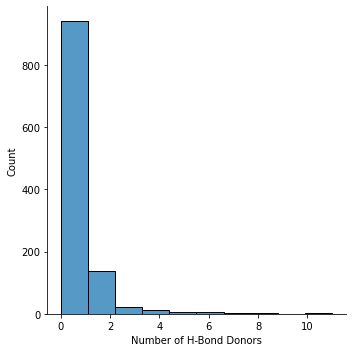

In [30]:
# Y_distribution = sns.load_dataset('delaney-processed.csv')
sns.displot(df["Number of H-Bond Donors"], bins=10, )

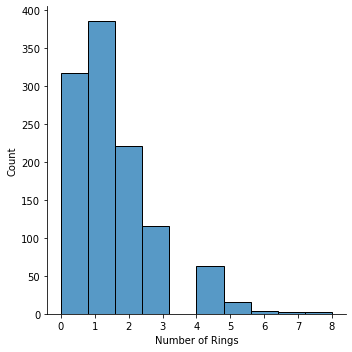

In [31]:
# Y_distribution = sns.load_dataset('delaney-processed.csv')
sns.displot(df["Number of Rings"], bins=10, )

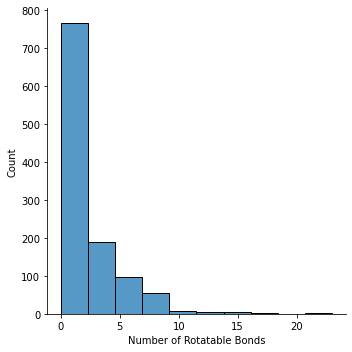

In [32]:
# Y_distribution = sns.load_dataset('delaney-processed.csv')
sns.displot(df["Number of Rotatable Bonds"], bins=10, )

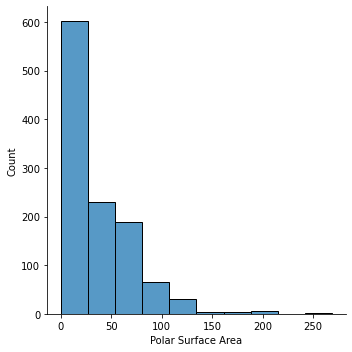

In [33]:
# Y_distribution = sns.load_dataset('delaney-processed.csv')
sns.displot(df["Polar Surface Area"], bins=10, )


## PreProcessing 
## Normalizing the dataset

In [82]:
X.columns.values

array(['Molecular Weight', 'Minimum Degree', 'Number of H-Bond Donors',
       'Number of Rings', 'Number of Rotatable Bonds',
       'Polar Surface Area'], dtype=object)

In [105]:
df = df.drop("Compound ID", axis=1)
df = df.drop("smiles", axis=1)

In [109]:
# from sklearn import preprocessing
# import pandas as pd
# # housing = pd.read_csv("/content/sample_data/california_housing_train.csv")
# scaled_data = preprocessing.normalize(df)
# scaled_data= pd.DataFrame(scaled_data, columns=df.columns.values)
# scaled_data.head()


,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
0,-0.001947,0.001999,0.914339,0.013992,0.005997,0.013992,0.404408,-0.001539
1,-0.014027,0.004862,0.978332,0.004862,0.009724,0.009724,0.205366,-0.016044
2,-0.016825,0.006524,0.993182,0.000000,0.000000,0.026096,0.111363,-0.013439
3,-0.023755,0.007179,0.999132,0.000000,0.017947,0.000000,0.000000,-0.028249
4,-0.026504,0.023749,0.999171,0.000000,0.011875,0.000000,0.000000,-0.015793


In [148]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = df.columns.values
d = scaler.fit_transform(df)
scaled_data = pd.DataFrame(d, columns=names)
scaled_data.head()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
0,0.808672,0.5,0.577050,0.636364,0.375,0.304348,0.753015,0.821700
1,0.631613,0.5,0.242098,0.090909,0.250,0.086957,0.157213,0.629742
2,0.659965,0.5,0.178053,0.000000,0.000,0.173913,0.063533,0.723824
3,0.285741,1.0,0.342932,0.000000,0.625,0.000000,0.000000,0.283005
4,0.692115,1.0,0.089031,0.000000,0.125,0.000000,0.000000,0.779211


In [149]:
X= scaled_data.drop("measured log solubility in mols per litre", axis=1)

In [150]:
Y= df["measured log solubility in mols per litre"]


## Splitting Data

#### 80%-> training data
#### 20% -> testing data

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2)

## 1. Linear Regression

In [152]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [154]:
# Predict the LogS value of X_test 
Y_pred_test = lin_model.predict(X_test)

print('Coefficients:', lin_model.coef_)
print('Intercept:', lin_model.intercept_)
print('Mean squared error (MSE): %.2f'
      % (mean_squared_error(Y_test, Y_pred_test)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [11.92791356 -0.26379969  0.93892416 -0.9445811  -1.40330209 -1.01547741
  0.10626848]
Intercept: -10.180399516265677
Mean squared error (MSE): 0.64
Coefficient of determination (R^2): 0.84


## Dropping less importance features

In [155]:
X_new_train = X_train.drop(columns="Number of H-Bond Donors")
X_new_train = X_train.drop(columns="Minimum Degree")

X_new_test = X_test.drop(columns="Minimum Degree")
X_new_test = X_test.drop(columns="Minimum Degree")


In [156]:
lin_model.fit(X_new_train, Y_train)

LinearRegression()

In [157]:
# Predict the LogS value of X_test 
Y_pred_test = lin_model.predict(X_new_test)

print('Coefficients:', lin_model.coef_)
print('Intercept:', lin_model.intercept_)
print('Mean squared error (MSE): %.2f'
      % (mean_squared_error(Y_test, Y_pred_test)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [11.9740512   1.10516585 -0.95403333 -1.52814283 -1.0554536   0.12691179]
Intercept: -10.366728440979715
Mean squared error (MSE): 0.64
Coefficient of determination (R^2): 0.84


In [158]:
import numpy as np

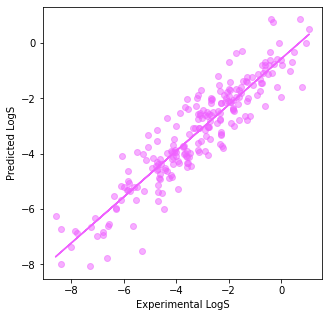

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))


# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#EF61FF", alpha=0.5)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#EF61FF")

plt.xlabel('Experimental LogS')
plt.ylabel('Predicted LogS')
plt.savefig('plot_linear-_logS.png')
plt.savefig('plot_horizontal_logS.pdf')
plt.show()


## 2. Ridge Regression

In [160]:
from sklearn import linear_model
Ridgemodel=linear_model.Ridge(alpha=0.99)
Ridgemodel.fit(X_train, Y_train)
Y_ridge_test = Ridgemodel.predict(X_test)

In [161]:
print('Coefficients:', Ridgemodel.coef_)
print('Intercept:', Ridgemodel.intercept_)
print('Mean squared error (MSE): %.2f'
      % (mean_squared_error(Y_test, Y_ridge_test)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_ridge_test))

Coefficients: [ 9.94285549 -0.42139439 -1.0728235  -0.35497081 -1.54708415 -1.13526589
  1.17112391]
Intercept: -8.506136384455818
Mean squared error (MSE): 0.68
Coefficient of determination (R^2): 0.83


In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(Ridgemodel, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)



In [163]:
Y_search_test= search.predict(X_test)

In [164]:
## checking the score after tunning
print('Mean squared error (MSE): %.2f'
      % (mean_squared_error(Y_test, Y_search_test)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_search_test))

Mean squared error (MSE): 0.64
Coefficient of determination (R^2): 0.84


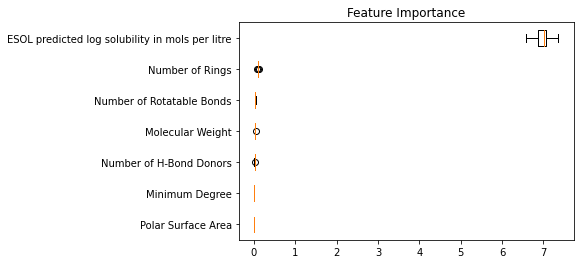

In [165]:
from sklearn.inspection import permutation_importance

result = permutation_importance(search, X_train, Y_train, n_repeats=10, random_state=42)

perm_imp_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[perm_imp_idx].T, vert=False,
            labels=X.columns[perm_imp_idx])
plt.title('Feature Importance')
plt.show()

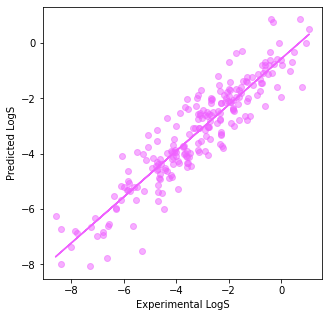

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))


# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#EF61FF", alpha=0.5)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#EF61FF")

plt.xlabel('Experimental LogS')
plt.ylabel('Predicted LogS')
plt.savefig('plot_horizontal_logS.png')
plt.savefig('plot_horizontal_logS.pdf')
plt.show()

## ADABOOST Regression

In [167]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

# define the model
model = AdaBoostRegressor()




In [168]:
model.fit(X_train, Y_train)
Y_pred_test=model.predict(X_test)
print(f"r2 Score Of Test Set : {r2_score(Y_test, Y_pred_test)}")

r2 Score Of Test Set : 0.8408381881402723


In [169]:
print('Mean squared error (MSE): %.2f'
      % (mean_squared_error(Y_test, Y_pred_test)))

Mean squared error (MSE): 0.64


In [170]:
Y_pred_train = model.predict(X_train)

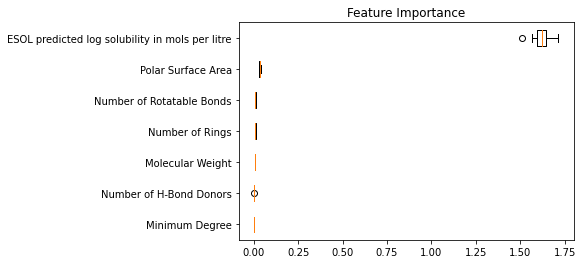

In [171]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_train, Y_train, n_repeats=10, random_state=42)

perm_imp_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[perm_imp_idx].T, vert=False,
            labels=X.columns[perm_imp_idx])
plt.title('Feature Importance')
plt.show()

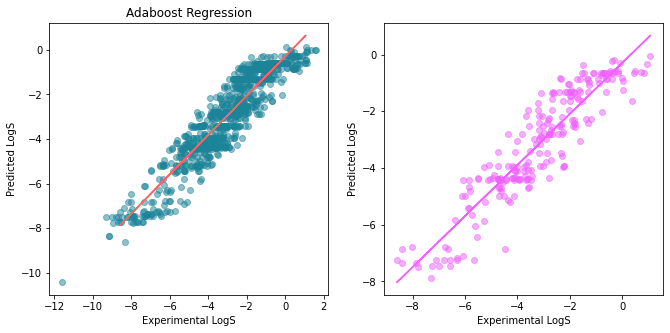

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#1c8499", alpha=0.5)

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#FF6161")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.title("Adaboost Regression")

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#EF61FF", alpha=0.5)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#EF61FF")

plt.xlabel('Experimental LogS')
plt.ylabel('Predicted LogS')
plt.savefig('plot_ADAhorizontal_logS.png')
plt.savefig('plot_ADAhorizontal_logS.pdf')
plt.show()

## DECISION TREE

In [173]:
from sklearn.tree import DecisionTreeRegressor

In [174]:
dtree = DecisionTreeRegressor()



In [175]:
dtree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [176]:
Y_pred_test = dtree.predict(X_test)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test, squared=True))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))




Mean squared error (MSE): 0.91
Coefficient of determination (R^2): 0.77


In [177]:
Y_pred_train = dtree.predict(X_train)

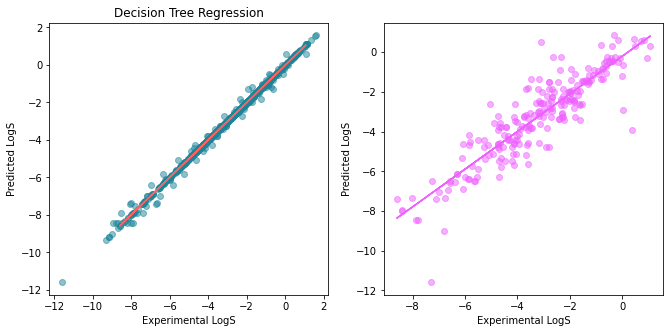

In [178]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#1c8499", alpha=0.5)

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#FF6161")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.title("Decision Tree Regression")

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#EF61FF", alpha=0.5)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#EF61FF")

plt.xlabel('Experimental LogS')
plt.ylabel('Predicted LogS')
plt.savefig('plot_ADAhorizontal_logS.png')
plt.savefig('plot_ADAhorizontal_logS.pdf')
plt.show()

## TUNNING THE MODELS

## RIDGE REGRESSION

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(Ridgemodel, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)

search.best_params_


{'alpha': 0.03}

In [180]:
Y_search_ridge_test= search.predict(X_test)

In [181]:
print('Mean squared error (MSE): %.2f'
      % (mean_squared_error(Y_test, Y_search_ridge_test)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_search_ridge_test))

Mean squared error (MSE): 0.64
Coefficient of determination (R^2): 0.84


In [182]:
Y_search_ridge_train= search.predict(X_train)

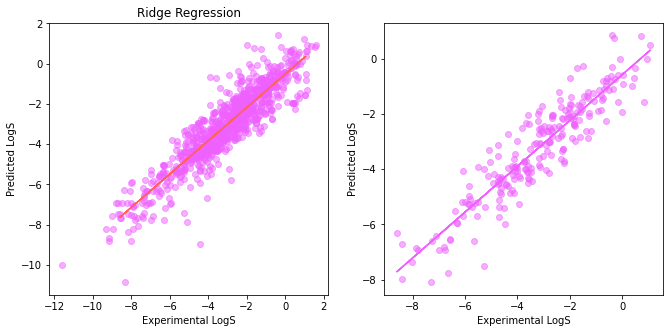

In [183]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_search_ridge_train, c="#EF61FF", alpha=0.5)

z = np.polyfit(Y_train, Y_search_ridge_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#FF6161")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.title("Ridge Regression")

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_search_ridge_test, c="#EF61FF", alpha=0.5)

z = np.polyfit(Y_test, Y_search_ridge_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#EF61FF")

plt.xlabel('Experimental LogS')
plt.ylabel('Predicted LogS')
plt.savefig('plot_TunedRidgehorizontal_logS.png')
plt.savefig('plot_TunedRidgehorizontal_logS.pdf')
plt.show()

## ADABOOST AND DECISION TREE

In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


ABC = AdaBoostRegressor(base_estimator = dtree)


# define grid
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
# define search
grid_search_ABC = GridSearchCV(ABC, search_grid, scoring = 'neg_mean_squared_error', cv=cv, n_jobs=-1)

# perform the search
results = grid_search_ABC.fit(X_train, Y_train)

grid_search_ABC.best_params_



{'learning_rate': 0.1, 'n_estimators': 2000, 'random_state': 1}

In [185]:
Y_search_ada_test= results.predict(X_test)

In [186]:
print('Mean squared error (MSE): %.2f'
      % (mean_squared_error(Y_test, Y_search_ada_test)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_search_ada_test))

Mean squared error (MSE): 0.46
Coefficient of determination (R^2): 0.88


In [187]:
Y_search_ada_train= results.predict(X_train)


In [188]:
print('Mean squared error (MSE): %.2f'
      % (mean_squared_error(Y_train, Y_search_ada_train)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_search_ada_train))

Mean squared error (MSE): 0.03
Coefficient of determination (R^2): 0.99


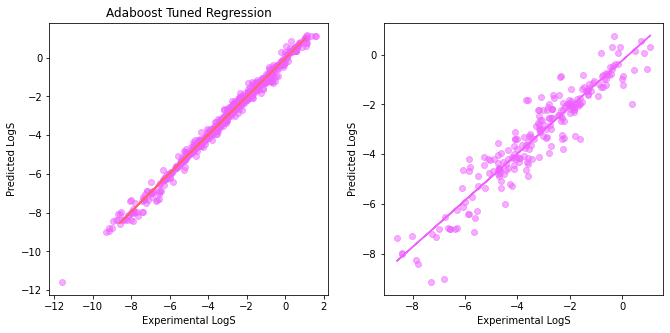

In [189]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_search_ada_train, c="#EF61FF", alpha=0.5)

z = np.polyfit(Y_train, Y_search_ada_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#FF6161")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.title("Adaboost Tuned Regression")

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_search_ada_test, c="#EF61FF", alpha=0.5)

z = np.polyfit(Y_test, Y_search_ada_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#EF61FF")

plt.xlabel('Experimental LogS')
plt.ylabel('Predicted LogS')
plt.savefig('plot_tunedADAhorizontal_logS.png')
plt.savefig('plot_tunedADAhorizontal_logS.pdf')
plt.show()